##Multiple Linear Regression

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [28]:
#Reading Dataset
df = pd.read_csv(r"D:\Programming\Machine Learning\economic_index.csv")

In [29]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [30]:
#Drop unnecessary Columns 
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


Text(0, 0.5, 'Unemployment_Rate')

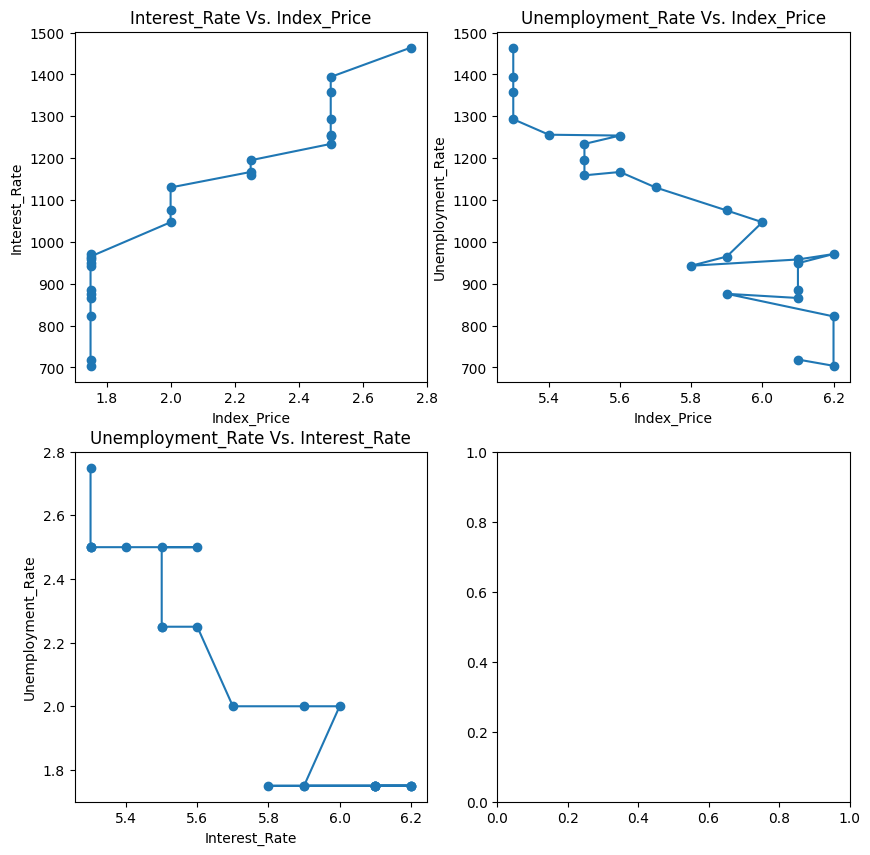

In [31]:
#Creating a Scatter and Line Plot for visualization
fig,axes = plt.subplots(2,2,figsize = (10,10))
axes[0,0].scatter(df['interest_rate'],df['index_price'])
axes[0,0].plot(df['interest_rate'],df['index_price'])
axes[0,0].set_title('Interest_Rate Vs. Index_Price')
axes[0,0].set_xlabel('Index_Price')
axes[0,0].set_ylabel('Interest_Rate')
axes[0,1].scatter(df['unemployment_rate'],df['index_price'])
axes[0,1].plot(df['unemployment_rate'],df['index_price'])
axes[0,1].set_title('Unemployment_Rate Vs. Index_Price')
axes[0,1].set_xlabel('Index_Price')
axes[0,1].set_ylabel('Unemployment_Rate')
axes[1,0].scatter(df['unemployment_rate'],df['interest_rate'])
axes[1,0].plot(df['unemployment_rate'],df['interest_rate'])
axes[1,0].set_title('Unemployment_Rate Vs. Interest_Rate')
axes[1,0].set_xlabel('Interest_Rate')
axes[1,0].set_ylabel('Unemployment_Rate')


In [32]:
#Check Null Value
df.isnull().sum()


interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

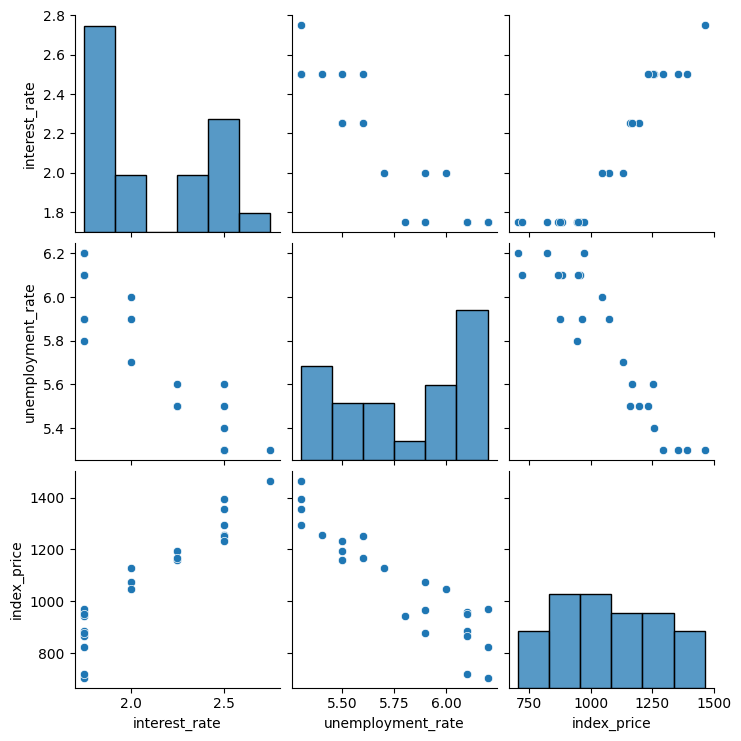

In [33]:
#Visualizing the data
sns.pairplot(df)

In [34]:
#Finding Correlation between Features
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [35]:
#Creating our Independent and Dependent Features
X = df[['interest_rate','unemployment_rate']]
#We can also do this like this
#X = df[:,:-1] this means take all row and all column exept last column value(which is our dependent feature)
Y = df['index_price']
#Y = df[;,-1] this means take all rows of the last column


In [36]:
#Train-Test-Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

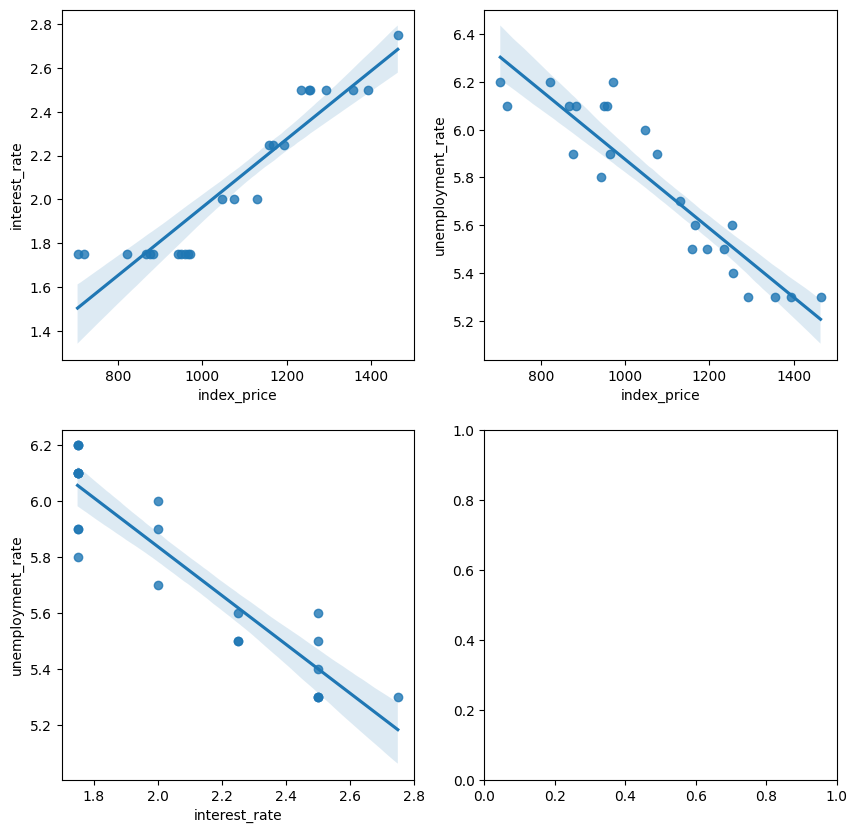

In [37]:
#Visualizing Regression Line
fig,axes = plt.subplots(2,2,figsize = (10,10))
sns.regplot(y='interest_rate',x='index_price',data=df,ax=axes[0,0])
sns.regplot(y='unemployment_rate',x='index_price',data=df,ax=axes[0,1])
sns.regplot(y='unemployment_rate',x='interest_rate',data=df,ax=axes[1,0])



In [38]:
#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.90115511  0.37908503]
 [ 1.31077107 -1.48187786]
 [-0.90115511  1.30956648]
 [ 1.31077107 -0.55139641]
 [ 1.31077107 -1.48187786]
 [-0.16384638  0.68924552]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -1.48187786]
 [ 1.31077107 -1.17171738]
 [-0.90115511  1.30956648]
 [-0.90115511  0.999406  ]
 [-0.90115511  0.37908503]
 [-0.90115511  0.999406  ]
 [ 0.57346234 -0.8615569 ]
 [-0.16384638 -0.24123593]
 [-0.90115511  0.06892455]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -0.8615569 ]]


In [39]:
# Creating Our Regression Model
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [40]:
#Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_absolute_error',cv=3)#scoring is the method through which you have to do cross validation or we can say  performance parameter you have to calculate for each cross validation and 'cv' is the no. of cross validation you have to do for example for cv = 3 the training data will we divided into 3 parts and each times a different part will be used for validation and two remaining parts will be used for training (all this will be done three times)

In [41]:
validation_score

array([-62.17890383, -85.09549795, -51.24389355])

In [42]:
validation_score.mean()

np.float64(-66.17276510903106)

In [43]:
#Prediction
Y_Pred = regression.predict(X_test)
print(Y_Pred)

[1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693]


In [44]:
regression.coef_

array([  88.27275507, -116.25716066])

In [45]:
#Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
MSE = mean_squared_error(Y_test,Y_Pred)
MAE = mean_absolute_error(Y_test,Y_Pred)
RMSE = root_mean_squared_error(Y_test,Y_Pred)
R_Squared  = r2_score(Y_test,Y_Pred)
print(MSE,MAE,RMSE,R_Squared)

5793.762887712569 59.935781523235484 76.11677139574805 0.8278978091457145


In [46]:
#Adjusted R_Squared
Adj_R_Squared = 1 - (1-R_Squared)*(len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] -1)
print(Adj_R_Squared)

0.7131630152428576


##ASUMPTIONS

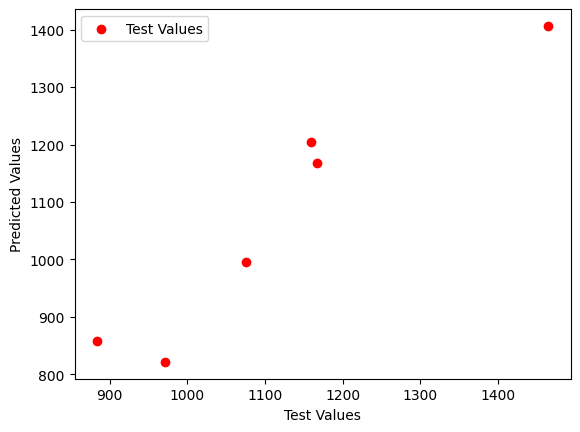

In [47]:
plt.scatter(Y_test,Y_Pred,color = 'red',label = 'Test Values')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.legend()


In [48]:
residuals = Y_test-Y_Pred

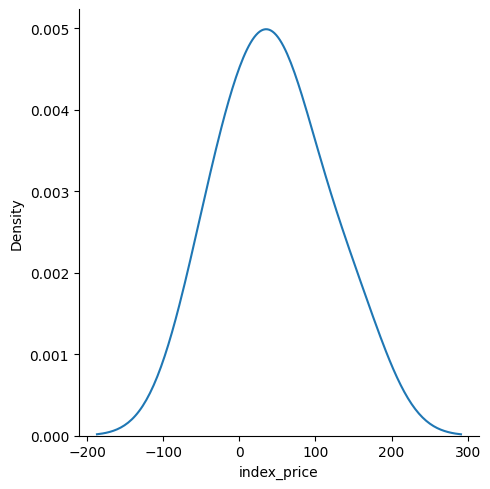

In [49]:
#Plot these residuals
sns.displot(residuals,kind='kde')

Text(0, 0.5, 'Residuals')

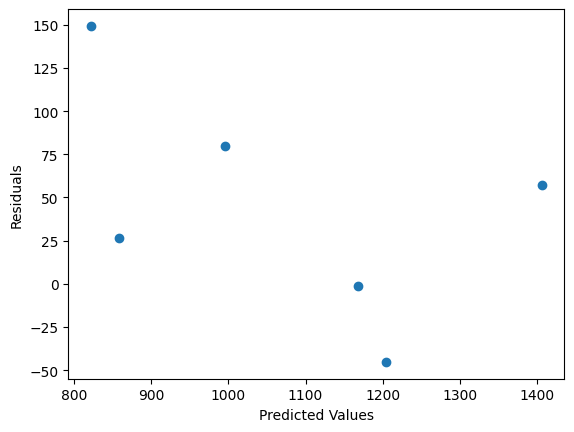

In [50]:
#Scatter Plot of residuals and predicted values
plt.scatter(Y_Pred,residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

In [51]:
#Model using OLS
import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()
model.predict()



array([-123.61879426,  287.98428644, -231.79392541,  179.80915529,
        287.98428644,  -94.59289851, -195.73554836,  287.98428644,
        251.92590939, -231.79392541, -195.73554836, -123.61879426,
       -195.73554836,  150.78325954,   13.58223264,  -87.56041721,
       -195.73554836,  215.86753234])

In [52]:
model.summary()

d:\Programming\Machine Learning\Machine_Learning\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 09 Jan 2025   Prob (F-statistic):                       0.754
Time:                        23:01:57   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""